![](latticegridquadrilateral.png)

find the number of unique lattice pythagoeran quadrilateral for which the radius of the circumcircle is r
given ABCD a quadirlateral

the coordinate of the points A,B,C and D are
 - A -> [xA,yA]
 - B -> [xB,yB]
 - C -> [xC,yC]
 - D -> [xD,yD]

and the Segments a,b,c and d are defined as follow:
 - a -> AB
 - b -> BC
 - c -> CD
 - d -> DA

the quadrilateral is a pythagoeran quadrilateral if and onli if
a²+b²+c²+d²=r²

with:
 - xA²+yA=r² 
 - xB²+yB=r²
 - xC²+yC=r²
 - xD²+yD=r²

furthermore pythagoeran quadrilateral is a lattice pythagoeran quadrilateral if and onli if all four vertices are lattice grid points

so 

xA,yA,xB,yB,xC,yC,xD,yD must be Natural number

and:
 - abs(xA) < r
 - abs(YA) < r
 - abs(xB) < r
 - abs(YB) < r
 - abs(xC) < r
 - abs(YC) < r
 - abs(xD) < r
 - abs(YD) < r
 
 in the end the problem can be reduced to determine the number of solution of the following system:
 

 - (1)  a² + b² + c² + d² = 8r² (1) 
 - (2)  (yB - yA)² + (xB - xA)² = a² 
 - (3)  (yC - yB)² + (xC - xB)² = b²
 - (4)  (yD - yC)² + (xD - xC)² = c²
 - (5)  (yA - yD)² + (xA - xD)² = d²
 - (6)  xA² + yA² = r² 
 - (7)  xB² + yB² = r²
 - (8)  xC² + yC² = r²
 - (9)  xD² + yD² = r²

 
reorganizing the system becomes:

 - yByA + xBxA + yCyB + xCxB + yDyC + xDxC + yAyD + xAxD = 0 
 
 with :
 
- xA,yA,xB,yB,xC,yC,xD,yD  Natural 

and:
 - abs(xA) < r
 - abs(YA) < r
 - abs(xB) < r
 - abs(YB) < r
 - abs(xC) < r
 - abs(YC) < r
 - abs(xD) < r
 - abs(YD) < r



In [43]:
import math

n=25
rang=int(math.sqrt(n))

for i in range(rang+1):
    print(i)

0
1
2
3
4
5


In [34]:
from sympy import factorint
factorint(1411033124176203125)

{5: 6, 13: 3, 17: 2, 29: 1, 37: 1, 41: 1, 53: 1, 61: 1}

In [44]:
def isqrt(n=5):
    """determin the closest integer squareroot from n"""
    x = n
    y = (x + 1) // 2
    while y < x:
        x = y
        y = (x + n // x) // 2 
    return x

def possible_quadrilateral_points(r=5):
    """find the crossing point of a circle of radius r and the lattice grid"""
    rang=int(2*isqrt(r**2)+1)
    rang
    points=[]
    for i in range(rang):
        a=(i-isqrt(r**2))
        for j in range(rang):
            b=(j-isqrt(r**2))
            if int(a**2)+int(b**2)==round(r**2):
                points.append([a,b])
    return points

def get_comb(x=['1','2','3','4','5','6','7','8'],n=4):
    """get all cpossible combinaison of n element in the list x"""
    combinations=set((itertools.combinations(x,n)))
    #combinations
    return combinations


def number_of_possible_quadrilaterals(n=5):
    """determine the number of pythagorean lattice grid quadrilateral"""
    # get all possible points for the quadrilateral
    points=possible_quadrilateral_points(n)

    # order the points in proper order
    even_p=[]
    odd_p=[]
    for i in range(len(points)):
        if i%2==0:
            even_p.append(points[i])
        else:
            odd_p.append(points[-i])
    points=even_p+ odd_p

    # build a point dictionary
    points_dict={}
    for i in range(len(points)):
        points_dict[(i+1)]=points[i]

    x=list(points_dict.keys())
    k=4

    # get all possible quadrilaterals
    combi=get_comb(x,k)

    # get all possible Pythagorean quadrilaterals, that verify the relation a²+b²+c²+d²=8r²
    sum_pyth_quad=0
    for element in combi:
        A=points_dict[element[0]]
        B=points_dict[element[1]]
        C=points_dict[element[2]]
        D=points_dict[element[3]]
        a2=((B[0]-A[0])**2+(B[1]-A[1])**2)
        b2=((C[0]-B[0])**2+(C[1]-B[1])**2)
        c2=((D[0]-C[0])**2+(D[1]-C[1])**2)
        d2=((A[0]-D[0])**2+(A[1]-D[1])**2)
        if round(a2+b2+c2+d2)==round(8*n*n):
            #print(A,B,C,D)
            sum_pyth_quad+=1
    return sum_pyth_quad

In [46]:
number_of_possible_quadrilaterals(5**(1/2))

38

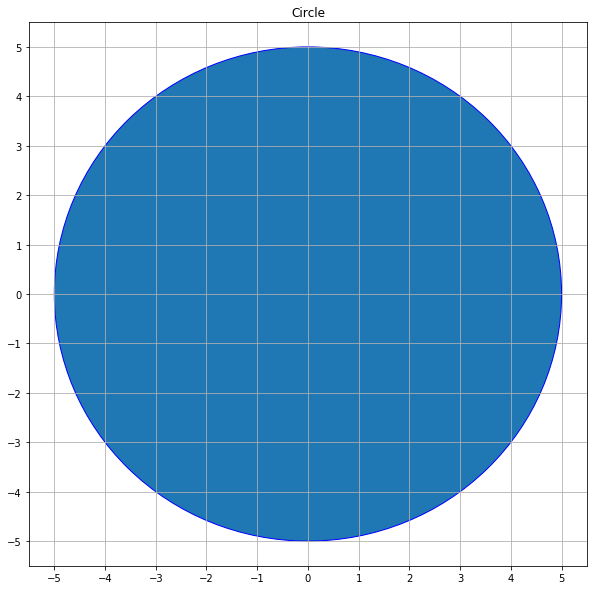

In [93]:
a=math.sqrt(2)
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.patches as patches
def Circle(radius):
    plt.figure(figsize=(10,10))
    circle=plt.Circle((0,0),radius,color=None, edgecolor='blue',facecolor=None,linewidth='1')
    plt.gca().add_patch(circle)
    plt.plot()
    #plt.axis('axis')
    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(-radius, radius+1, 1)


    plt.xticks(major_ticks)
    plt.yticks(major_ticks)


    plt.title('Circle')
    plt.grid(which='both')
    plt.show()
def main():
    #radius=float(input('Enter the radius:'))
    radius=math.sqrt(25)
    Circle(float(radius))

main()

